<a href="https://colab.research.google.com/github/SILVIAIRENE/Data-Scientist-Machine-Learning-Engineer-Introductory-Course/blob/master/Matriz_bidimensional_y_problema_de_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forma de x: (1001,)
Forma de y: (1001,)
Forma de la matriz unida: (1001, 2)
Forma del gradiente: (1000,)
El gradiente es: 12.000000000000284


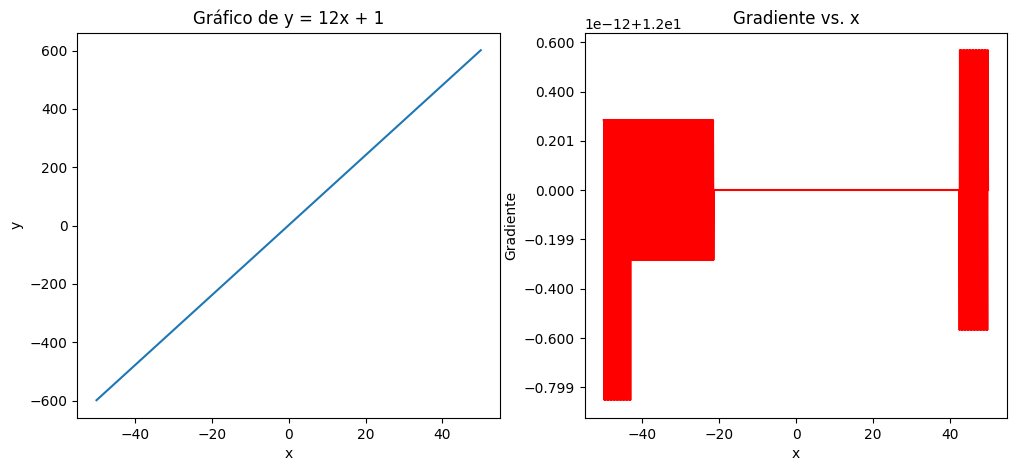

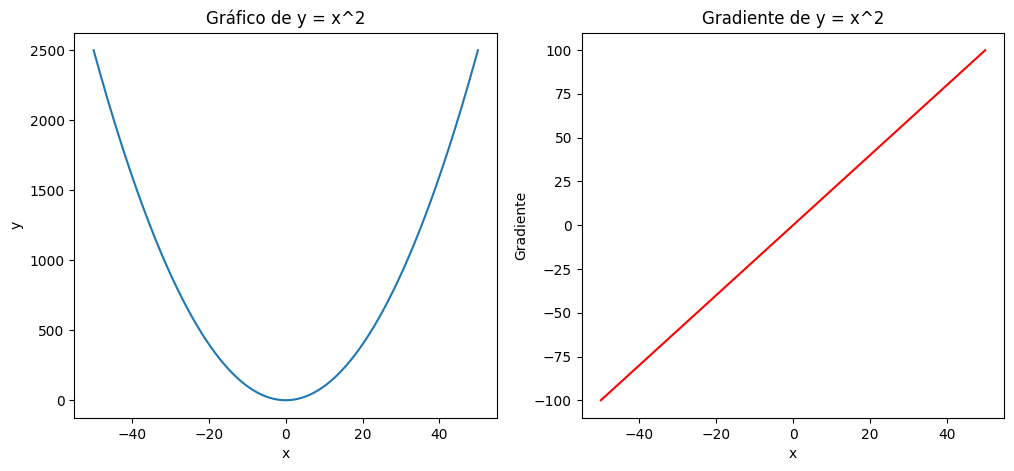

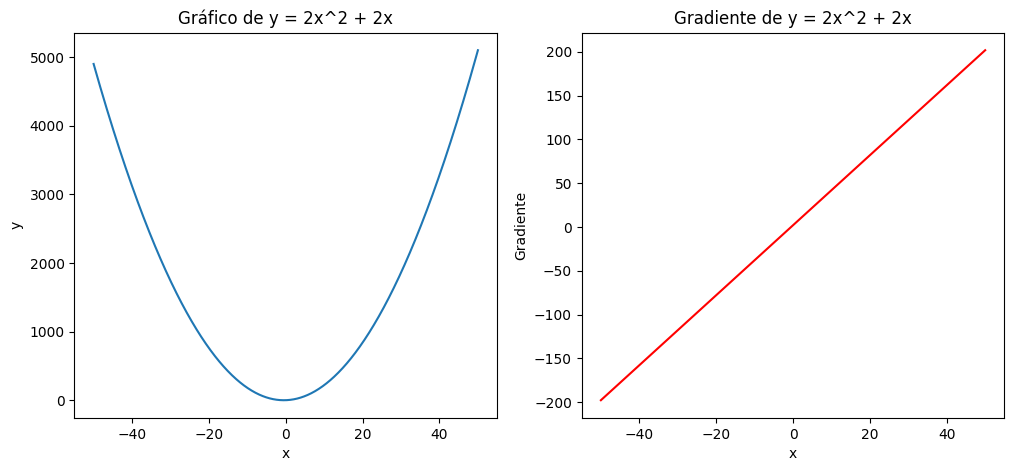

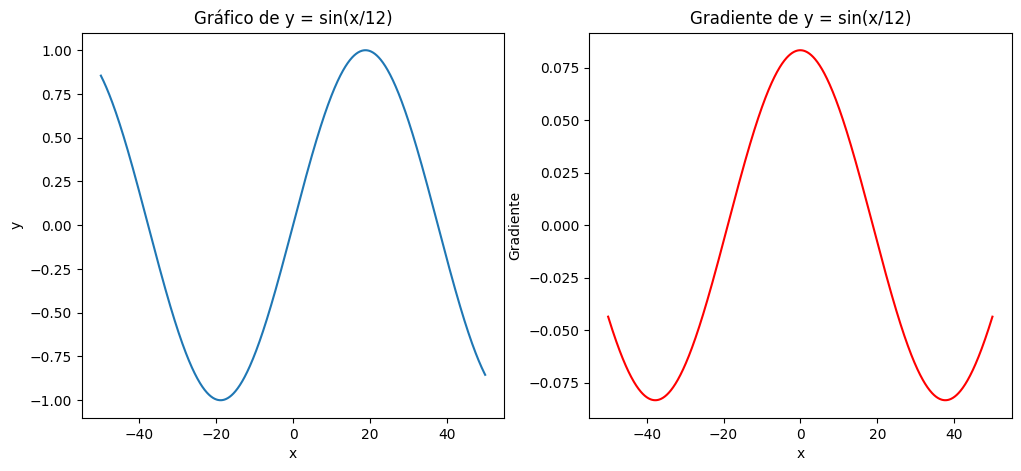

El valor mínimo de y es: 5.048709793414476e-25
El índice del valor mínimo es: 500
El valor de x en el mínimo es: 7.105427357601002e-13

La pendiente antes de tomar el mínimo (en x=-0.1) es: -0.1
La pendiente después de tomar el mínimo (en x=0.0) es: 0.1


In [ ]:
#1
import numpy as np

# Creamos un ndarray para x en el rango de -50 a 50
x = np.arange(-50, 50.1, 0.1)
print(f"Forma de x: {x.shape}")

# Calculamos y para cada valor de x
y = 12*x + 1
print(f"Forma de y: {y.shape}")
#2
# Unimos los arreglos x e y en una matriz de 1001x2
# np.vstack une verticalmente, por lo que transponemos
xy_array = np.vstack((x, y)).T
print(f"Forma de la matriz unida: {xy_array.shape}")
#3
# Calcular el cambio en y y el cambio en x
delta_y = y[1:] - y[:-1]
delta_x = x[1:] - x[:-1]

# Calcular el gradiente
gradient = delta_y / delta_x
print(f"Forma del gradiente: {gradient.shape}")
print(f"El gradiente es: {gradient[0]}") # Para esta función lineal, el gradiente es constante
#4
import matplotlib.pyplot as plt

# Gráfico de la función lineal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title("Gráfico de y = 12x + 1")
plt.xlabel("x")
plt.ylabel("y")

# Gráfico del gradiente vs. x
plt.subplot(1, 2, 2)
# El gradiente tiene 1000 elementos, así que graficamos vs. los primeros 1000 de x
plt.plot(x[:-1], gradient, color='red')
plt.title("Gradiente vs. x")
plt.xlabel("x")
plt.ylabel("Gradiente")
plt.show()
#5
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calcula el gradiente de una función.

    Args:
      function: Una función de Python que toma un np.ndarray y devuelve otro.
      x_range: Una tupla que define el rango de x (start, stop, step).

    Returns:
      tuple: Un ndarray de forma (n, 2) con x e y, y el ndarray del gradiente.
    """
    x_array = np.arange(x_range[0], x_range[1], x_range[2])
    y_array = function(x_array)

    gradient = (y_array[1:] - y_array[:-1]) / (x_array[1:] - x_array[:-1])

    # Unir x e y para el retorno
    xy_array = np.vstack((x_array, y_array)).T

    return xy_array, gradient

# Definir las tres funciones
def function1(x):
    return x**2

def function2(x):
    return 2*x**2 + 2*x

def function3(x):
    return np.sin(x/12)

# Calcular y graficar el gradiente para cada función
functions = [function1, function2, function3]
titles = ["y = x^2", "y = 2x^2 + 2x", "y = sin(x/12)"]

for i, func in enumerate(functions):
    xy_array, gradient = compute_gradient(func)

    plt.figure(figsize=(12, 5))

    # Gráfico de la función
    plt.subplot(1, 2, 1)
    plt.plot(xy_array[:, 0], xy_array[:, 1])
    plt.title(f"Gráfico de {titles[i]}")
    plt.xlabel("x")
    plt.ylabel("y")

    # Gráfico del gradiente
    plt.subplot(1, 2, 2)
    plt.plot(xy_array[:-1, 0], gradient, color='red')
    plt.title(f"Gradiente de {titles[i]}")
    plt.xlabel("x")
    plt.ylabel("Gradiente")
    plt.show()
    #6
    # Calcular los valores de y para la función1 (y = x**2)
x_for_min = np.arange(-50, 50.1, 0.1)
y_for_min = x_for_min**2

# Encontrar el valor mínimo de y
min_y = y_for_min.min()
print(f"El valor mínimo de y es: {min_y}")

# Encontrar el índice del valor mínimo
min_index = y_for_min.argmin()
print(f"El índice del valor mínimo es: {min_index}")

# Encontrar el valor de x en el índice del valor mínimo
x_at_min = x_for_min[min_index]
print(f"El valor de x en el mínimo es: {x_at_min}")

# Mostrar la pendiente antes y después del mínimo
# Calculamos el gradiente para la función
_, gradient_min = compute_gradient(function1)

# La pendiente justo antes del mínimo (en el índice del mínimo -1)
pendiente_antes = gradient_min[min_index - 1]
# La pendiente justo después del mínimo
pendiente_despues = gradient_min[min_index]

print(f"\nLa pendiente antes de tomar el mínimo (en x={x_for_min[min_index - 1]:.1f}) es: {pendiente_antes:.1f}")
print(f"La pendiente después de tomar el mínimo (en x={x_for_min[min_index]:.1f}) es: {pendiente_despues:.1f}")